# Datetime en Pandas DataFrame

In [17]:
import pandas as pd
import numpy as np

In [18]:
pd.__version__

'2.1.2'



### 1. Fechas y horas en Python
Los objetos básicos de Python para trabajar con fechas y horas residen en el módulo incorporado ``datetime``.
Junto con el módulo de terceros ``dateutil``, puedes utilizarlo para realizar rápidamente una serie de funciones útiles sobre fechas y horas.
Por ejemplo, puedes construir manualmente una fecha utilizando el tipo ``datetime``:

In [19]:
from datetime import datetime
datetime(year = 2015, month = 7, day = 4)

datetime.datetime(2015, 7, 4, 0, 0)

O, utilizando el módulo ``dateutil``, puedes analizar fechas a partir de una gran variedad de formatos de cadena:

In [20]:
# https://dateutil.readthedocs.io/en/stable/parser.html#functions
from dateutil import parser
print(parser.parse("4th of July, 2015"))
print(parser.parse("07/04/2015"))
print(parser.parse("07/04/2015", dayfirst=True))

2015-07-04 00:00:00
2015-07-04 00:00:00
2015-04-07 00:00:00


In [21]:
print(parser.parse("7/4/2015"))
print(parser.parse("07-04-2015"))
print(parser.parse("2015-07-04"))

2015-07-04 00:00:00
2015-07-04 00:00:00
2015-07-04 00:00:00


Una vez que tienes un objeto ``datetime``, puedes hacer cosas como imprimir el día de la semana:


In [22]:
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
datetime(year = 2015, month = 7, day = 4).strftime('%A')

'Saturday'

### 2. Dates y Times en numpy

In [23]:
import numpy as np
date = np.array('2015-07-04', dtype = np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

**Cuidado! No podemos crear una fecha que no sea en este formato**

In [24]:

    np.array('07-04-2015', dtype = np.datetime64)

ValueError: Cannot create a NumPy datetime other than NaT with generic units

Una vez que tenemos esta fecha formateada, además, podemos hacer rápidamente operaciones vectoriales sobre ella:

In [25]:
date

array('2015-07-04', dtype='datetime64[D]')

In [26]:
np.arange(14)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [27]:
dates = date + np.arange(12)
dates

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [28]:
dates[0].astype('datetime64[Y]')

numpy.datetime64('2015')

Aquí tienes un datetime basado en minutos:

In [29]:
np.datetime64('2015-07-04 12:00:30')

numpy.datetime64('2015-07-04T12:00:30')

Fíjate en que la zona horaria **se ajusta automáticamente a la hora local del ordenador que ejecuta el código**.
Puedes forzar cualquier unidad deseada utilizando uno de los muchos códigos de formato; por ejemplo, aquí forzaremos un tiempo basado en nanosegundos.

La siguiente tabla, extraída de la [NumPy datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), enumera los códigos de formato disponibles junto con los intervalos de tiempo relativos y absolutos que pueden codificar:

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

### 3. Fechas y horas en Pandas

#### Argumentos por defecto

In [30]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df

,date,value
0,3/10/2000,2
1,3/11/2000,3
2,3/12/2000,4


In [31]:
df.dtypes

date     object
value     int64
dtype: object

In [32]:
df['date'] = pd.to_datetime(df['date'])
df

,date,value
0,2000-03-10,2
1,2000-03-11,3
2,2000-03-12,4


In [33]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

#### Formato para el primer día

In [34]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df

,date,value
0,2000-10-03,2
1,2000-11-03,3
2,2000-12-03,4


#### Formato personalizado 

In [35]:
df = pd.DataFrame({'date': ['2016-6-10 20:30:0', 
                            '2016-7-1 19:45:30', 
                            '2013-10-12 4:5:1'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S")
df

,date,value
0,2016-06-10 20:30:00,2
1,2016-07-01 19:45:30,3
2,2013-10-12 04:05:01,4


#### Trabajando con error de análisis

In [36]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'])

ValueError: time data "a/11/2000" doesn't match format "%m/%d/%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [37]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], errors = 'ignore')
df.dtypes

date     object
value     int64
dtype: object

In [38]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df

,date,value
0,2000-03-10,2
1,NaT,3
2,2000-03-12,4


In [39]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [40]:
print(df.at[0, 'date'])
print(df.at[1, 'date'])

2000-03-10 00:00:00
NaT


### 4. Ensamblar una fecha y hora a partir de varias columnas

In [41]:
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})

df

,year,month,day
0,2015,2,4
1,2016,3,5


In [42]:
df['date'] = pd.to_datetime(df)

In [43]:
df

,year,month,day,date
0,2015,2,4,2015-02-04
1,2016,3,5,2016-03-05


In [44]:
df.dtypes

year              int64
month             int64
day               int64
date     datetime64[ns]
dtype: object

### 5. Obtener año, mes y día

In [45]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})

df['DoB'] = pd.to_datetime(df['DoB'])
df

,name,DoB
0,Tom,1997-08-05
1,Andy,1996-04-28
2,Lucas,1995-12-16


In [46]:
df['year'] = df['DoB'].dt.year
df['month'] = df['DoB'].dt.month
df['day'] = df['DoB'].dt.day
df

,name,DoB,year,month,day
0,Tom,1997-08-05,1997,8,5
1,Andy,1996-04-28,1996,4,28
2,Lucas,1995-12-16,1995,12,16


In [47]:
df.dtypes

name             object
DoB      datetime64[ns]
year              int32
month             int32
day               int32
dtype: object

### 6. Obtener la semana del año, el día de la semana y el año bisiesto

In [48]:
df['week_of_year'] = df['DoB'].dt.isocalendar().week
df['day_of_week'] = df['DoB'].dt.dayofweek
df['is_leap_year'] = df['DoB'].dt.is_leap_year
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year
0,Tom,1997-08-05,1997,8,5,32,1,False
1,Andy,1996-04-28,1996,4,28,17,6,True
2,Lucas,1995-12-16,1995,12,16,50,5,False


In [49]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df['day_of_week_name']=df['DoB'].dt.weekday.map(dw_mapping)
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday


### 7. Obtener la edad a partir de la fecha de nacimiento

In [50]:
pd.to_datetime('today')

Timestamp('2023-12-18 22:41:18.445956')

In [51]:
datetime.today()

datetime.datetime(2023, 12, 18, 22, 41, 20, 120398)

In [52]:
today = pd.to_datetime('today')
df['age'] = today.year - df['DoB'].dt.year

df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name,age
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday,26
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday,27
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday,28


### 8. Mejorar el rendimiento estableciendo la columna de fecha como índice 

In [63]:
df = pd.read_csv('data/city_sales.psd', parse_dates = ['date'])
df

,date,num,city
0,2015-01-01 09:00:00,4,London
1,2015-01-01 09:01:00,4,London
2,2015-01-01 09:02:00,3,London
3,2015-01-01 09:03:00,3,London
4,2015-01-01 09:04:00,3,London
...,...,...,...
1795139,2019-01-31 15:56:00,3,Cambridge
1795140,2019-01-31 15:57:00,3,Cambridge
1795141,2019-01-31 15:58:00,3,Cambridge
1795142,2019-01-31 15:59:00,3,Cambridge


In [54]:
df.describe(include='all')

,date,num,city
count,1795144,1.795144e+06,1795144
unique,NaN,NaN,4
top,NaN,NaN,London
freq,NaN,NaN,448786
mean,2017-01-16 10:05:27.579737344,2.801503e+00,NaN
min,2015-01-01 09:00:00,1.000000e+00,NaN
25%,2016-01-08 12:30:00,2.000000e+00,NaN
50%,2017-01-17 00:30:00,3.000000e+00,NaN
75%,2018-01-24 12:30:00,3.000000e+00,NaN
max,2019-01-31 16:00:00,4.000000e+00,NaN


In [55]:
4*448786

1795144

In [56]:
df.dtypes

date    datetime64[ns]
num              int64
city            object
dtype: object

In [62]:
df = pd.read_csv('data/city_sales.psd', parse_dates = ['date'])
df.set_index(['date'], inplace=True)
df.head()

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London


In [78]:
df = pd.read_csv('data/city_sales.psd', parse_dates = ['date'], index_col = 'date')
df.head()

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London


In [69]:
# Tenemos un DateTimeIndex
df.index

DatetimeIndex(['2015-01-01 09:00:00', '2015-01-01 09:01:00',
               '2015-01-01 09:02:00', '2015-01-01 09:03:00',
               '2015-01-01 09:04:00', '2015-01-01 09:05:00',
               '2015-01-01 09:06:00', '2015-01-01 09:07:00',
               '2015-01-01 09:08:00', '2015-01-01 09:09:00',
               ...
               '2019-01-31 15:51:00', '2019-01-31 15:52:00',
               '2019-01-31 15:53:00', '2019-01-31 15:54:00',
               '2019-01-31 15:55:00', '2019-01-31 15:56:00',
               '2019-01-31 15:57:00', '2019-01-31 15:58:00',
               '2019-01-31 15:59:00', '2019-01-31 16:00:00'],
              dtype='datetime64[ns]', name='date', length=1795144, freq=None)

In [64]:
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

### 9. Seleccionar los datos con un año específico y realizar la agregación

In [70]:
df.loc['2018']

,num,city
date,,
2018-01-01 09:00:00,2,London
2018-01-01 09:01:00,1,London
2018-01-01 09:02:00,3,London
2018-01-01 09:03:00,3,London
2018-01-01 09:04:00,3,London
...,...,...
2018-12-31 15:56:00,4,Cambridge
2018-12-31 15:57:00,2,Cambridge
2018-12-31 15:58:00,3,Cambridge


In [71]:
df.loc['2018', 'num'].head()

date
2018-01-01 09:00:00    2
2018-01-01 09:01:00    1
2018-01-01 09:02:00    3
2018-01-01 09:03:00    3
2018-01-01 09:04:00    3
Name: num, dtype: int64

In [72]:
df.loc['2018'].groupby('city').sum()

,num
city,
Cambridge,308428
Durham,307965
London,307431
Oxford,307366


### 10. Seleccionar datos con un mes específico o un día específico del mes

In [73]:
df.loc['2018-5'].head()

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London


In [74]:
df.loc['2018-5-1'].head()

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London


In [75]:
cond = df.index.month == 2
df[cond].head()

,num,city
date,,
2015-02-02 09:00:00,4,London
2015-02-02 09:01:00,3,London
2015-02-02 09:02:00,3,London
2015-02-02 09:03:00,2,London
2015-02-02 09:04:00,1,London


### 11. Seleccionar datos entre dos fechas

In [80]:
df

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London
...,...,...
2019-01-31 15:56:00,3,Cambridge
2019-01-31 15:57:00,3,Cambridge
2019-01-31 15:58:00,3,Cambridge


**Nota de profesor**: Cuidado aquí, si no añadimos un sort index en este caso tendremos la siguiente excepción (Pandas 2.0):

*FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version. return self._getitem_tuple_same_dim(tup)*

In [82]:
df.sort_index().loc['2016':'2018']

,num,city
date,,
2016-01-01 09:00:00,3,Cambridge
2016-01-01 09:00:00,4,London
2016-01-01 09:00:00,3,Durham
2016-01-01 09:00:00,3,Oxford
2016-01-01 09:01:00,2,Oxford
...,...,...
2018-12-31 15:59:00,2,Oxford
2018-12-31 16:00:00,2,Durham
2018-12-31 16:00:00,3,Oxford


In [84]:
df.sort_index().loc['2018-5-2 10' : '2018-5-2 11' ]

,num,city
date,,
2018-05-02 10:00:00,3,Cambridge
2018-05-02 10:00:00,3,Oxford
2018-05-02 10:00:00,3,Durham
2018-05-02 10:00:00,2,London
2018-05-02 10:01:00,3,London
...,...,...
2018-05-02 11:58:00,4,Cambridge
2018-05-02 11:59:00,3,Durham
2018-05-02 11:59:00,1,Cambridge


In [85]:
df.sort_index().loc['2018-5-2 10:30' : '2018-5-2 10:45' ]

,num,city
date,,
2018-05-02 10:30:00,3,London
2018-05-02 10:30:00,3,Oxford
2018-05-02 10:30:00,2,Durham
2018-05-02 10:30:00,3,Cambridge
2018-05-02 10:31:00,2,Durham
...,...,...
2018-05-02 10:44:00,3,Cambridge
2018-05-02 10:45:00,4,London
2018-05-02 10:45:00,3,Durham


In [86]:
df.sort_index().between_time('10:30','10:45')

,num,city
date,,
2015-01-01 10:30:00,4,London
2015-01-01 10:30:00,4,Cambridge
2015-01-01 10:30:00,4,Oxford
2015-01-01 10:30:00,2,Durham
2015-01-01 10:31:00,3,London
...,...,...
2019-01-31 10:44:00,2,London
2019-01-31 10:45:00,4,London
2019-01-31 10:45:00,4,Cambridge


In [87]:
df.shape

(1795144, 2)

### 12. Operaciones con fechas

In [88]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})

df['DoB'] = pd.to_datetime(df['DoB'])
df

,name,DoB
0,Tom,1997-08-05
1,Andy,1996-04-28
2,Lucas,1995-12-16


In [89]:
from pandas.tseries.offsets import DateOffset, BDay

print(df['DoB'] + DateOffset(days = 5))
print(df['DoB'] + DateOffset(days = -5))
print(df['DoB'] + DateOffset(months = 5))

0   1997-08-10
1   1996-05-03
2   1995-12-21
Name: DoB, dtype: datetime64[ns]
0   1997-07-31
1   1996-04-23
2   1995-12-11
Name: DoB, dtype: datetime64[ns]
0   1998-01-05
1   1996-09-28
2   1996-05-16
Name: DoB, dtype: datetime64[ns]


In [90]:
BDay(10)

<10 * BusinessDays>

In [91]:
print(df['DoB'])
print(df['DoB'] + BDay(10))

0   1997-08-05
1   1996-04-28
2   1995-12-16
Name: DoB, dtype: datetime64[ns]
0   1997-08-19
1   1996-05-10
2   1995-12-29
Name: DoB, dtype: datetime64[ns]


In [92]:
df['DoB+10BD'] = df['DoB'] + BDay(10)
df

,name,DoB,DoB+10BD
0,Tom,1997-08-05,1997-08-19
1,Andy,1996-04-28,1996-05-10
2,Lucas,1995-12-16,1995-12-29


In [93]:
df['date_diff'] = (df['DoB+10BD'] - df['DoB']).dt.days
df

,name,DoB,DoB+10BD,date_diff
0,Tom,1997-08-05,1997-08-19,14
1,Andy,1996-04-28,1996-05-10,12
2,Lucas,1995-12-16,1995-12-29,13


In [94]:
df.dtypes

name                 object
DoB          datetime64[ns]
DoB+10BD     datetime64[ns]
date_diff             int64
dtype: object

### 13. Secuencias Regulares: ``pd.date_range()``

Para hacer más cómoda la creación de secuencias de **fechas regulares**, Pandas ofrece unas cuantas funciones para este propósito: ``pd.date_range()`` para timestamps, ``pd.period_range()`` para periodos, y ``pd.timedelta_range()`` para deltas de tiempo.
Hemos visto que **`range()`` de Python y ``np.arange()``** de NumPy convierten un punto de inicio, un punto final y un tamaño de paso o step opcional en una secuencia.
Del mismo modo, ``pd.date_range()`` acepta una fecha inicial, una fecha final y un código de frecuencia opcional para crear una secuencia regular de fechas.
Por defecto, la frecuencia es de un día:

In [95]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternativamente, el intervalo de fechas puede especificarse no con un punto de inicio y un punto final, sino con un punto de inicio y un número de periodos:

In [96]:
pd.date_range('2015-07-03', periods = 8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

El espaciado puede modificarse alterando el argumento ``freq``, que por defecto es ``D``.
Por ejemplo, aquí construiremos un rango de marcas de tiempo horarias:

In [97]:
pd.date_range('2015-01-01', periods = 12, freq='M')

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

### 14. Trabajando con valores perdidos

In [99]:
# Creamos algunos missings aposta con la rolling window
df = pd.read_csv('data/city_sales.psd', parse_dates=['date'], index_col='date')
df

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London
...,...,...
2019-01-31 15:56:00,3,Cambridge
2019-01-31 15:57:00,3,Cambridge
2019-01-31 15:58:00,3,Cambridge


In [102]:
df

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London
...,...,...
2019-01-31 15:56:00,3,Cambridge
2019-01-31 15:57:00,3,Cambridge
2019-01-31 15:58:00,3,Cambridge


Nota de profesor: **Cuidado!** rolling requiere de dropear las columnas de tipo objeto antes de unificar.

In [103]:
df['rolling_sum'] = df.drop('city',axis = 1).rolling(3).sum()
df.head()

,num,city,rolling_sum
date,,,
2015-01-01 09:00:00,4,London,NaN
2015-01-01 09:01:00,4,London,NaN
2015-01-01 09:02:00,3,London,11.0
2015-01-01 09:03:00,3,London,10.0
2015-01-01 09:04:00,3,London,9.0


In [105]:
df['rolling_sum_back'] = df['rolling_sum'].bfill()
df.head()

,num,city,rolling_sum,rolling_sum_back
date,,,,
2015-01-01 09:00:00,4,London,NaN,11.0
2015-01-01 09:01:00,4,London,NaN,11.0
2015-01-01 09:02:00,3,London,11.0,11.0
2015-01-01 09:03:00,3,London,10.0,10.0
2015-01-01 09:04:00,3,London,9.0,9.0


In [106]:
# Creating the dataframe 
df = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":[None, 2, 54, 3, None],
                   "C":[20, 16, None, 3, 8],
                   "D":[14, 3, None, None, 6]})
  
# Print the dataframe
df

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,NaN,NaN
3,NaN,3.0,3.0,NaN
4,1.0,NaN,8.0,6.0


In [107]:
df.interpolate(method = 'linear')

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,9.5,4.0
3,3.0,3.0,3.0,5.0
4,1.0,3.0,8.0,6.0


### 15. Resampling, Windowing and Shifting

In [132]:
goog = pd.read_csv('data/GOOG.psd')
goog['Date'] =  pd.to_datetime(goog['Date'])
goog.set_index('Date', inplace=True)
goog



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
...,...,...,...,...,...,...
2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900
2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800


In [110]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-01-04 to 2020-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB


In [133]:
# goog = goog['Close']
goog = goog.ffill()
goog

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
...,...,...,...,...,...,...
2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900
2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800


In [116]:
import matplotlib

Ahora sí que sí, podemos ver el precio a lo largo de los años de la acción de google:

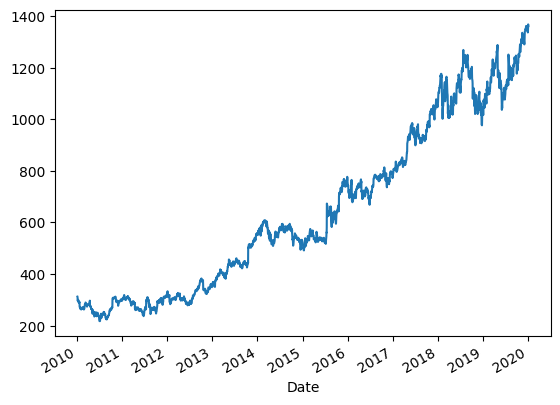

In [134]:

goog['Close'].plot();

Aquí podemos ver que con el método resample, podemos escoger diferentes códigos o estrategias de resampleo. Aquí hemos elegido BA o en otras palabras, last bussiness day of the year. El resto de datos que estaban en el año lo hemos agregados con la medio de todos los días

In [135]:
goog.resample('BA').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,267.154630,269.464070,264.402920,266.811472,266.811472,6.383553e+06
2011-12-30,283.523139,286.110425,280.751839,283.424738,283.424738,6.179412e+06
2012-12-31,320.195071,322.927847,317.288286,320.208021,320.208021,5.228172e+06
2013-12-31,440.160271,443.407307,437.217431,440.470378,440.470378,4.190346e+06
2014-12-31,560.709645,564.495206,555.162255,559.803290,559.803290,2.487038e+06
2015-12-31,602.057314,607.442765,596.090603,602.005681,602.005681,2.069434e+06
2016-12-30,743.732459,749.421629,737.597905,743.486707,743.486707,1.832266e+06
2017-12-29,921.121193,926.898963,915.331412,921.780837,921.780837,1.476514e+06
2018-12-31,1113.554101,1125.777606,1101.001658,1113.225134,1113.225134,1.741965e+06


In [136]:
goog.asfreq('BA')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,297.255798,298.092682,294.909607,295.875977,295.875977,3090000
2011-12-30,319.811279,322.172424,319.811279,321.744019,321.744019,3577800
2012-12-31,348.693024,353.958282,346.700470,352.369232,352.369232,4009600
2013-12-31,554.043335,558.406982,551.064453,558.262512,558.262512,2725900
2014-12-31,529.795471,531.141724,524.360352,524.958740,524.958740,1368200
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900
2016-12-30,782.750000,782.780029,770.409973,771.820007,771.820007,1770000
2017-12-29,1046.719971,1049.699951,1044.900024,1046.400024,1046.400024,887500
2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300


In [137]:
goog

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
...,...,...,...,...,...,...
2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900
2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800


In [146]:
goog.sort_index().loc['2017' : '2020']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
2017-01-04,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2017-01-05,786.080017,794.479980,785.020020,794.020020,794.020020,1335200
2017-01-06,795.260010,807.900024,792.203979,806.150024,806.150024,1640200
2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1274600
...,...,...,...,...,...,...
2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900
2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800


In [ ]:
goog.loc['2012-12-31']

Recuerda que el resample que hemos hecho es una media a cierre de año, mientras que el asfrec es el valor a cierre de año que tuvimos, de ahí las diferencias.

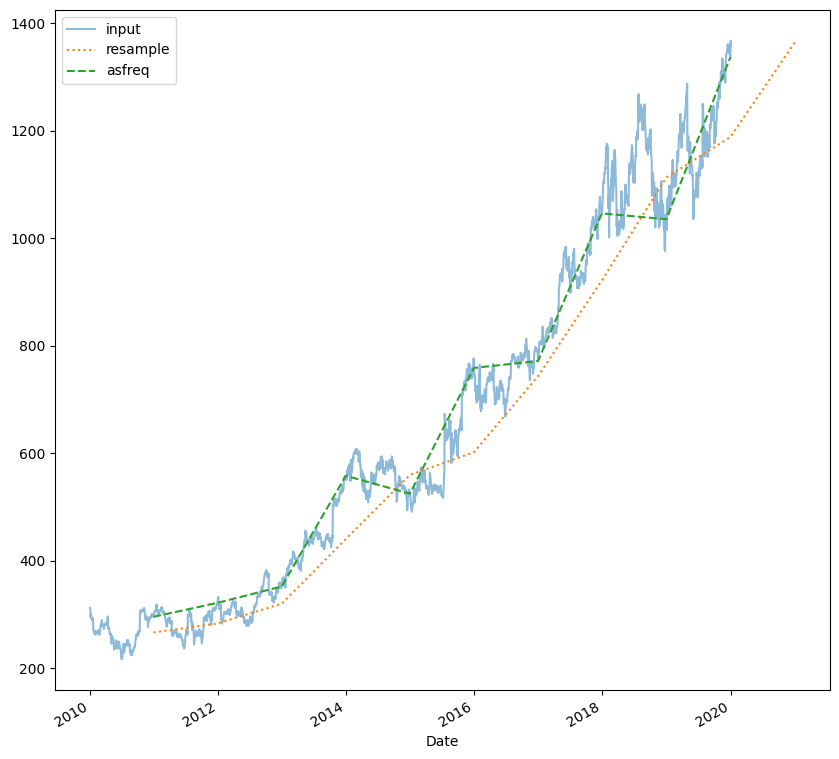

In [147]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
goog['Close'].plot(alpha=0.5, style='-')
goog['Close'].resample('BA').mean().plot(style=':')
goog['Close'].asfreq('BA').plot(style='--');

plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

In [148]:
print(goog.resample('BA').mean()[-1:])

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-12-31  1344.705017  1370.320007  1343.546997  1364.015015  1364.015015   

               Volume  
Date                   
2020-12-31  1296500.0  


In [149]:
print(goog.resample('BA').mean()[-1:])
goog.loc['2020'].mean()

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-12-31  1344.705017  1370.320007  1343.546997  1364.015015  1364.015015   

               Volume  
Date                   
2020-12-31  1296500.0  


Open         1.344705e+03
High         1.370320e+03
Low          1.343547e+03
Close        1.364015e+03
Adj Close    1.364015e+03
Volume       1.296500e+06
dtype: float64

In [150]:
goog.asfreq('BA')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,297.255798,298.092682,294.909607,295.875977,295.875977,3090000
2011-12-30,319.811279,322.172424,319.811279,321.744019,321.744019,3577800
2012-12-31,348.693024,353.958282,346.700470,352.369232,352.369232,4009600
2013-12-31,554.043335,558.406982,551.064453,558.262512,558.262512,2725900
2014-12-31,529.795471,531.141724,524.360352,524.958740,524.958740,1368200
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900
2016-12-30,782.750000,782.780029,770.409973,771.820007,771.820007,1770000
2017-12-29,1046.719971,1049.699951,1044.900024,1046.400024,1046.400024,887500
2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300


| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

In [151]:
goog = goog['Close']

In [152]:
goog.shift(1)

Date
2010-01-04            NaN
2010-01-05     312.204773
2010-01-06     310.829926
2010-01-07     302.994293
2010-01-08     295.940735
                 ...     
2019-12-27    1360.400024
2019-12-30    1351.890015
2019-12-31    1336.140015
2020-01-02    1337.020020
2020-01-03    1367.369995
Name: Close, Length: 2518, dtype: float64

In [153]:
pd.DataFrame({'Data': goog,
             'Data-1': goog.shift(1),
             'Diff': goog - goog.shift(1),
             '%Crec': round(((goog - goog.shift(1))/goog)*100,2)})

,Data,Data-1,Diff,%Crec
Date,,,,
2010-01-04,312.204773,NaN,NaN,NaN
2010-01-05,310.829926,312.204773,-1.374847,-0.44
2010-01-06,302.994293,310.829926,-7.835633,-2.59
2010-01-07,295.940735,302.994293,-7.053558,-2.38
2010-01-08,299.885956,295.940735,3.945221,1.32
...,...,...,...,...
2019-12-27,1351.890015,1360.400024,-8.510009,-0.63
2019-12-30,1336.140015,1351.890015,-15.750000,-1.18
2019-12-31,1337.020020,1336.140015,0.880005,0.07


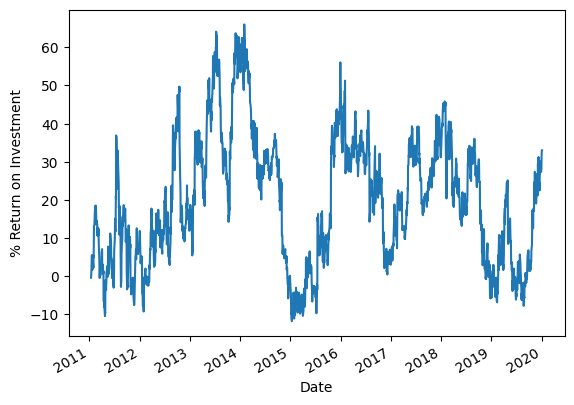

In [154]:
# Calcular el ROI de la inversión
ROI = 100 * (goog - goog.shift(261)) / goog.shift(261)
ROI.plot()
plt.ylabel('% Return on Investment');

### 16. Rolling window

In [155]:
rolling = goog.rolling(261, center=True) # 365 - weekends (aprox(52*2))
rolling

Rolling [window=261,center=True,axis=0,method=single]

In [156]:
rolling.mean()

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
              ..
2019-12-27   NaN
2019-12-30   NaN
2019-12-31   NaN
2020-01-02   NaN
2020-01-03   NaN
Name: Close, Length: 2518, dtype: float64

Como puedes ver, al haber usado el parámetro de center, hemos usado una estrategia diferente, hemos usado el **Center = True**, quiere decir que cada elemento del DataFrame df es es el elemento central de cada ventana y se le agrega (tamaño ventana /2) elemento a la izquierda y (tamaño ventana /2) a la derecha. En este ejemplo es 3/2 = 1, por ende se le agrega 1 elemento a la izquierda y un 1 a la derecha. Es por ello que vemos comenzar a la serie de std y de suma a mitad de año 2010 y acabar a finales del 2019:

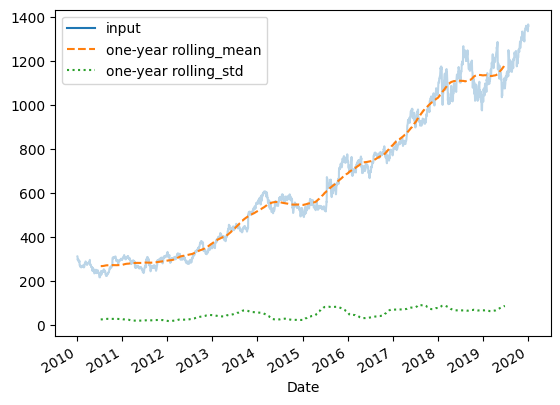

In [157]:
rolling = goog.rolling(261, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})

ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)